In [67]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline

In [68]:
df = pd.read_csv("/content/diabetes.csv")

In [69]:
df.shape

(768, 9)

In [70]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [71]:
df.isnull().any()

Pregnancies                 False
Glucose                     False
BloodPressure               False
SkinThickness               False
Insulin                     False
BMI                         False
DiabetesPedigreeFunction    False
Age                         False
Outcome                     False
dtype: bool

In [72]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [74]:
df.Insulin.unique()

array([  0,  94, 168,  88, 543, 846, 175, 230,  83,  96, 235, 146, 115,
       140, 110, 245,  54, 192, 207,  70, 240,  82,  36,  23, 300, 342,
       304, 142, 128,  38, 100,  90, 270,  71, 125, 176,  48,  64, 228,
        76, 220,  40, 152,  18, 135, 495,  37,  51,  99, 145, 225,  49,
        50,  92, 325,  63, 284, 119, 204, 155, 485,  53, 114, 105, 285,
       156,  78, 130,  55,  58, 160, 210, 318,  44, 190, 280,  87, 271,
       129, 120, 478,  56,  32, 744, 370,  45, 194, 680, 402, 258, 375,
       150,  67,  57, 116, 278, 122, 545,  75,  74, 182, 360, 215, 184,
        42, 132, 148, 180, 205,  85, 231,  29,  68,  52, 255, 171,  73,
       108,  43, 167, 249, 293,  66, 465,  89, 158,  84,  72,  59,  81,
       196, 415, 275, 165, 579, 310,  61, 474, 170, 277,  60,  14,  95,
       237, 191, 328, 250, 480, 265, 193,  79,  86, 326, 188, 106,  65,
       166, 274,  77, 126, 330, 600, 185,  25,  41, 272, 321, 144,  15,
       183,  91,  46, 440, 159, 540, 200, 335, 387,  22, 291, 39

In [75]:
df.Insulin.max()

846

In [76]:
df.Insulin.min()

0

In [77]:
scaled_value = (0 - 90) / (846 - 90)


In [78]:
def scale(value, min_value, max_value):
    return (value - min_value) / (max_value - min_value)


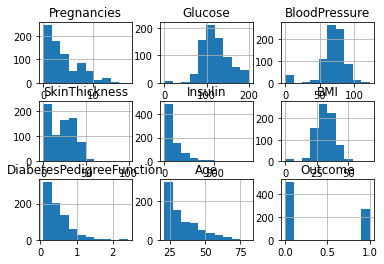

In [79]:
df.hist()
plt.show()

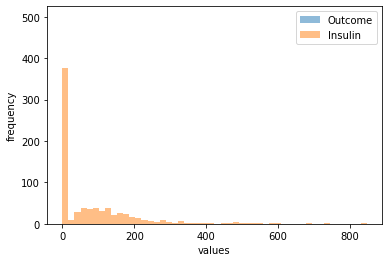

In [94]:
import matplotlib.pyplot as plt
import pandas as pd


# Extract the two columns you want to plot
col1 = df['Outcome']
col2 = df['Insulin']

# Plot the histograms for the two columns
plt.hist(col1, bins=50, alpha=0.5, label='Outcome')
plt.hist(col2, bins=50, alpha=0.5, label='Insulin')

# Add labels and a legend
plt.xlabel('values')
plt.ylabel('frequency')
plt.legend()

# Show the plot
plt.show()


In [95]:
#Input Variable 
X = df.Insulin.values
#Output Variable
y = df.Outcome.values

In [96]:
import numpy as np

class RidgeRegression:
    def __init__(self, alpha=1.0):
        self.alpha = alpha
        self.w = None
        
    def fit(self, X, y):
        n_samples, n_features = X.shape
        I = np.identity(n_features)
        self.w = np.linalg.inv(X.T @ X + self.alpha * I) @ X.T @ y
        
    def predict(self, X):
        return X @ self.w


In [97]:
import numpy as np

# Generate some random data
np.random.seed(0)
X = np.random.randn(100, 5)
y = X[:, 0] + 2 * X[:, 1] + np.random.randn(100)

In [98]:
# Split the data into training and test sets
X_train, X_test = X[:80], X[80:]
y_train, y_test = y[:80], y[80:]

In [99]:
# Fit the model
model = RidgeRegression(alpha=1.0)
model.fit(X_train, y_train)

In [100]:
# Evaluate the model on the test set
y_pred = model.predict(X_test)
error = np.mean((y_test - y_pred) ** 2)
print("Test MSE:", error)

Test MSE: 1.0181884071602547
